Loan Application Status Prediction

Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading datset
df=pd.read_csv('loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.shape

(614, 13)

In [7]:
#checking null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

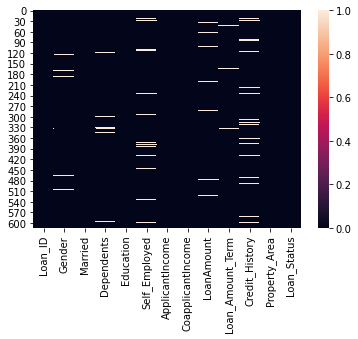

In [8]:
#checking null values using heatmap
sns.heatmap(df.isnull())

we can see that their is null values present in Gender,Dependents,Self_employed,Loanamount,loan_mount_term and credit_histry

In [9]:
# filling the missing values for numerical terms using mean

df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [10]:
# Filling the missing values for categorical terms using mode

df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [11]:
#checking null values again
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA

<AxesSubplot:xlabel='Gender', ylabel='count'>

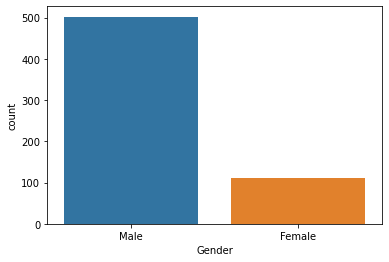

In [12]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

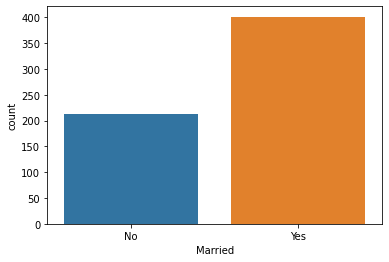

In [13]:
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

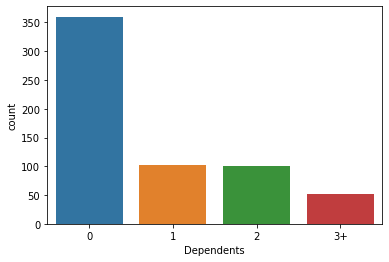

In [14]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

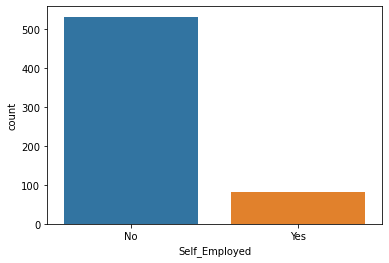

In [15]:
sns.countplot(df['Self_Employed'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

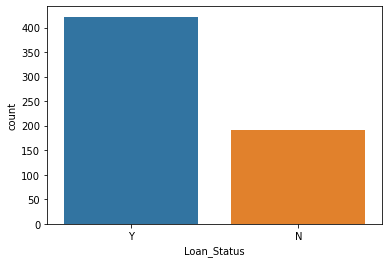

In [16]:
sns.countplot(df['Loan_Status'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

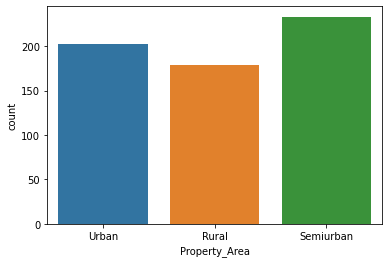

In [17]:
sns.countplot(df['Property_Area'])

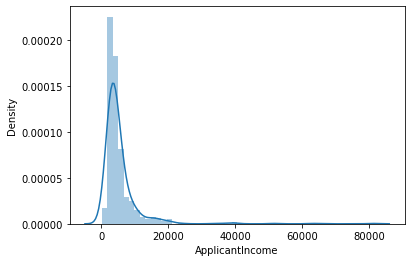

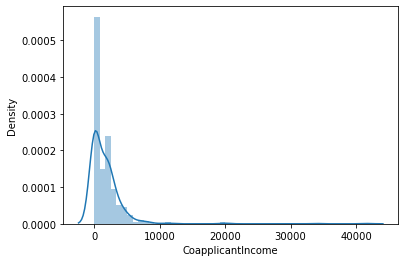

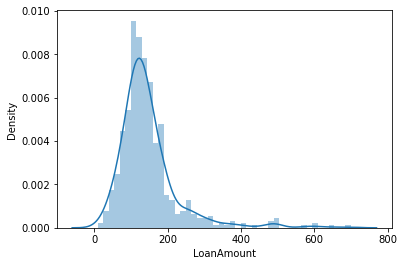

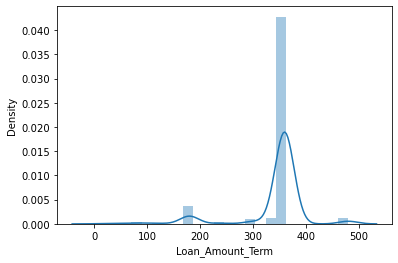

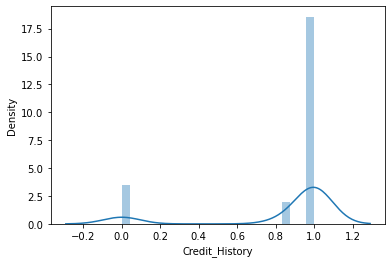

In [18]:
# checking that data is normally distributed or not
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

ApplicantIncome         AxesSubplot(0.125,0.536818;0.0945122x0.343182)
CoapplicantIncome    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
LoanAmount           AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Loan_Amount_Term     AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Credit_History       AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
dtype: object

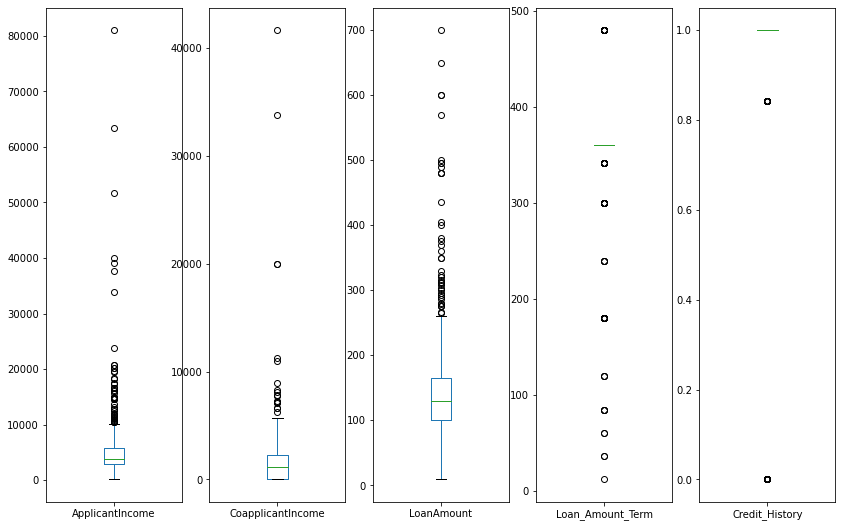

In [19]:
df.plot(kind='box',subplots=True,layout=(2,7),figsize=(20,20))

we can say that many outliers are present in ApplicantIncome, CoaaplicantIncome, LoanAmount

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

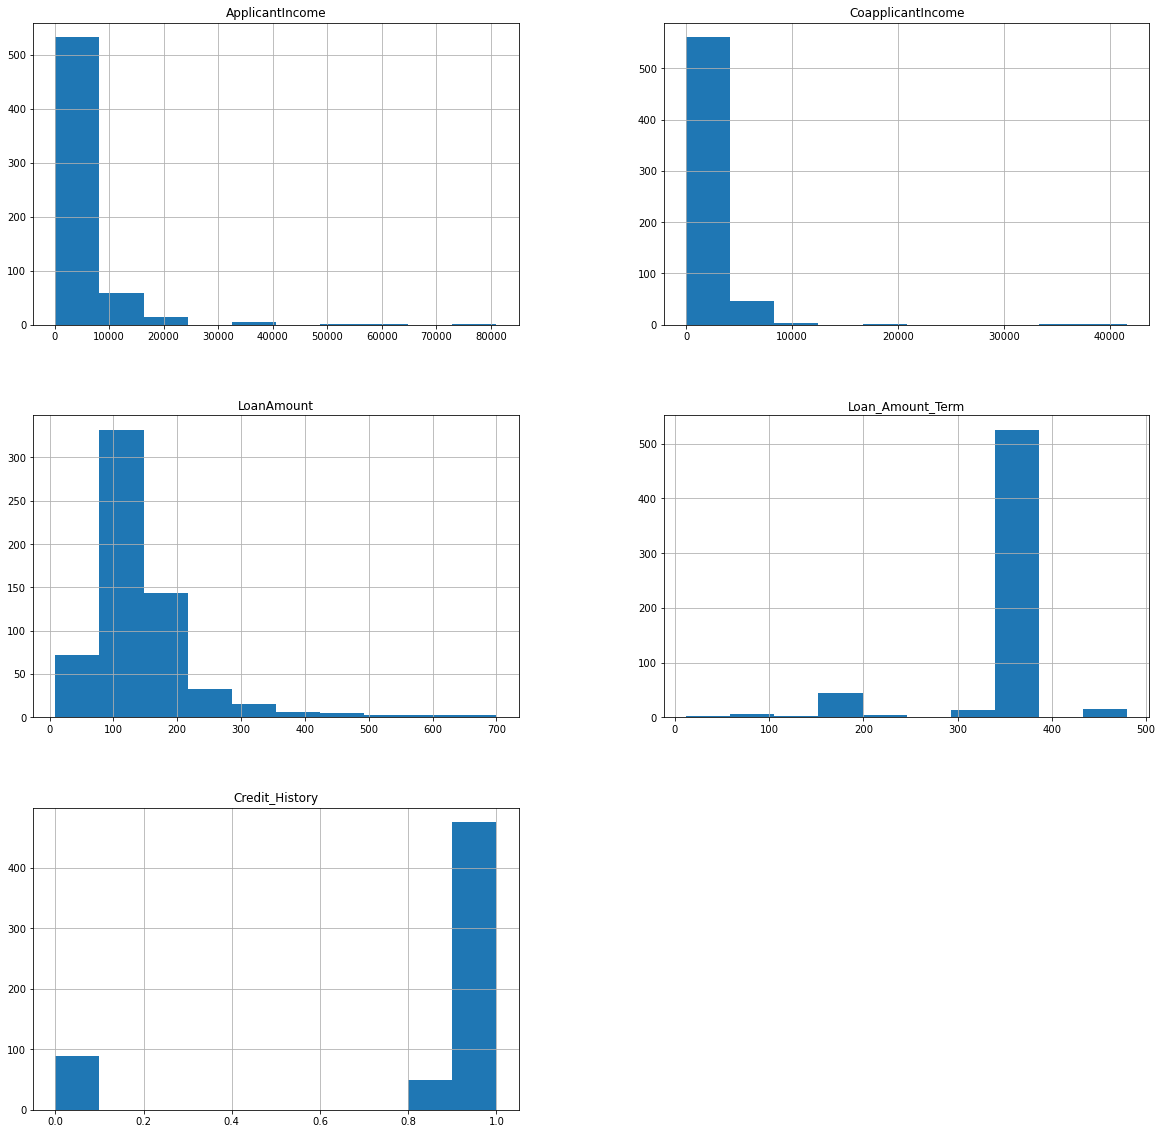

In [23]:
df.hist(figsize=(20,20))

<AxesSubplot:xlabel='Gender', ylabel='count'>

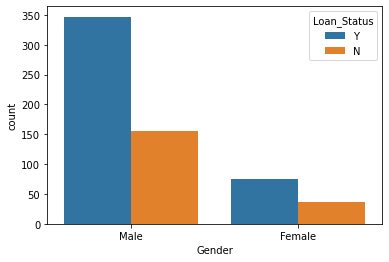

In [24]:
sns.countplot(x="Gender",hue="Loan_Status",data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

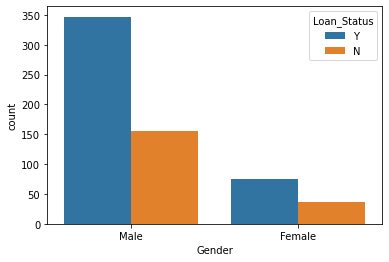

In [25]:
sns.countplot(x="Gender",hue="Loan_Status",data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

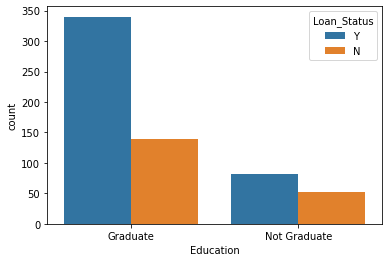

In [26]:
sns.countplot(x="Education",hue="Loan_Status",data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

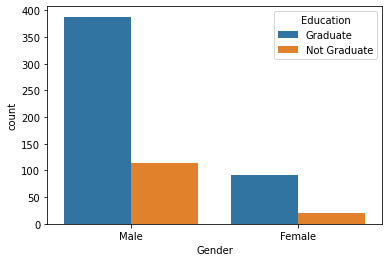

In [27]:
sns.countplot(x="Gender",hue="Education",data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

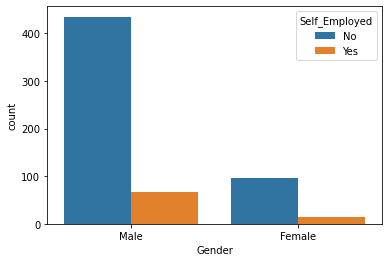

In [28]:
sns.countplot(x="Gender",hue="Self_Employed",data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

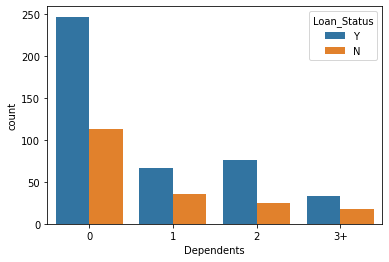

In [29]:
sns.countplot(x="Dependents",hue="Loan_Status",data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

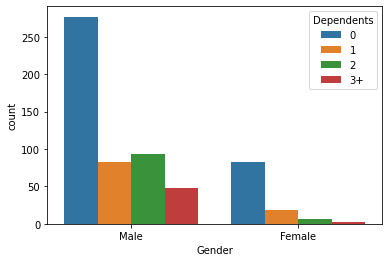

In [30]:
sns.countplot(x="Gender",hue="Dependents",data=df)

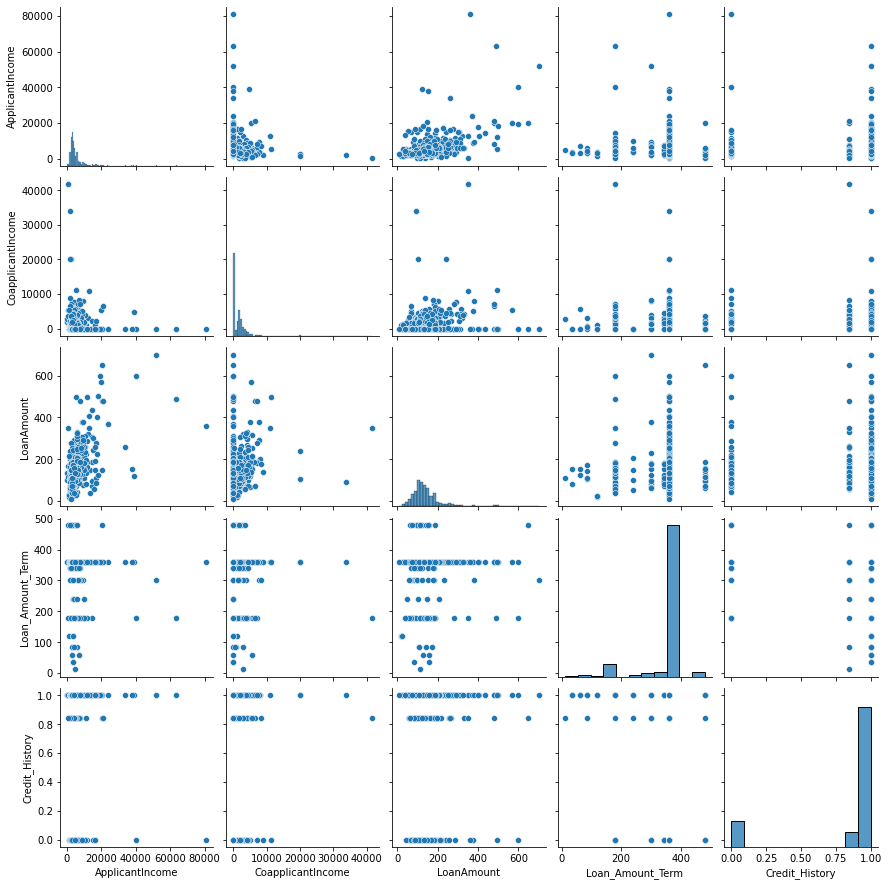

In [31]:
sns.pairplot(df)

In [32]:
#reducing column

df['Total_income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [33]:
#droppring extra columns
df.drop(columns=["ApplicantIncome"],inplace=True)
df.drop(columns=["CoapplicantIncome"],inplace=True)

In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0


In [35]:
df.shape

(614, 12)

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=['Gender','Loan_ID','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in lst:
    df[i]=le.fit_transform(df[i].astype(str))


### Satatical analysis 

In [37]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,146.412162,342.000000,0.842199,1.037459,0.687296,7024.705081
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,84.037468,64.372489,0.349681,0.787482,0.463973,6458.663872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,1442.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000,4166.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,129.000000,360.000000,1.000000,1.000000,1.000000,5416.500000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,164.750000,360.000000,1.000000,2.000000,1.000000,7521.750000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,700.000000,480.000000,1.000000,2.000000,1.000000,81000.000000


<function matplotlib.pyplot.show(close=None, block=None)>

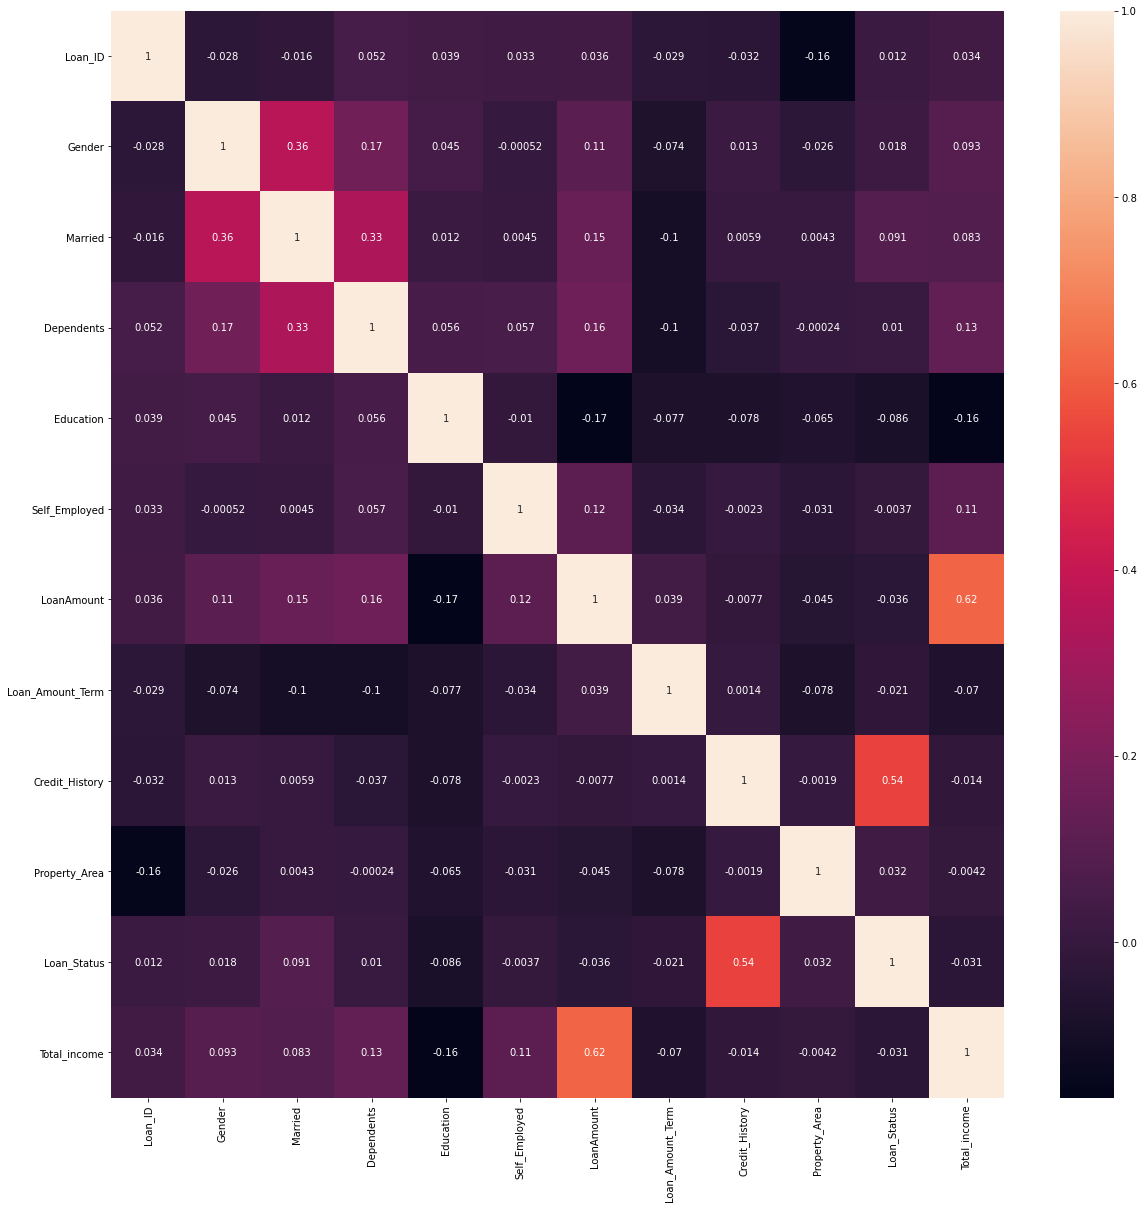

In [38]:
#checking corelation between the columns through heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show

In [39]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.035684,-0.028945,-0.032429,-0.155416,0.011773,0.033774
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.107930,-0.073567,0.012819,-0.025752,0.017987,0.093191
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.147141,-0.100863,0.005852,0.004257,0.091478,0.083319
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.163106,-0.101054,-0.037392,-0.000244,0.010118,0.125590
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884,-0.161362
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.115260,-0.033943,-0.002260,-0.030860,-0.003700,0.113000
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,1.000000,0.038801,-0.007738,-0.044776,-0.036416,0.620102
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,0.038801,1.000000,0.001395,-0.077620,-0.020974,-0.069830
Credit_History,-0.032429,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.007738,0.001395,1.000000,-0.001880,0.540483,-0.014447
Property_Area,-0.155416,-0.025752,0.004257,-0.000244,-0.065243,-0.030860,-0.044776,-0.077620,-0.001880,1.000000,0.032112,-0.004218


### Removing outliers 

In [40]:
#checking skewness
df.skew()

Loan_ID             0.000000
Gender             -1.648795
Married            -0.644850
Dependents          1.015551
Education           1.367622
Self_Employed       2.159796
LoanAmount          2.726601
Loan_Amount_Term   -2.389680
Credit_History     -1.963600
Property_Area      -0.066196
Loan_Status        -0.809998
Total_income        5.633449
dtype: float64

In [41]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [42]:
df.skew()

Loan_ID             0.009411
Gender             -1.633836
Married            -0.633385
Dependents          1.042928
Education           1.317262
Self_Employed       2.241256
LoanAmount          1.187261
Loan_Amount_Term   -2.087826
Credit_History     -1.933150
Property_Area      -0.054901
Loan_Status        -0.816015
Total_income        2.049400
dtype: float64

In [43]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [44]:
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income
0,0,1,0,0,0,0,146.412162,360.0,1.0,2,5849.0
1,1,1,1,1,0,0,128.000000,360.0,1.0,0,6091.0
2,2,1,1,0,0,1,66.000000,360.0,1.0,2,3000.0
3,3,1,1,0,1,0,120.000000,360.0,1.0,2,4941.0
4,4,1,0,0,0,0,141.000000,360.0,1.0,2,6000.0


In [45]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [46]:
x.shape

(581, 11)

In [47]:
y.shape

(581,)

In [48]:
y=y.values.reshape(-1,1)

In [49]:
y.shape

(581, 1)

In [50]:
#Using standard scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler()


In [51]:
#Reducing skewness of the data set
for i in x.columns:
    if x.skew().loc[i]>0.55:
        x[i]=np.log1p(x[i])

In [52]:
x.skew()

Loan_ID             0.009411
Gender             -1.633836
Married            -0.633385
Dependents          0.703256
Education           1.317262
Self_Employed       2.241256
LoanAmount         -0.648520
Loan_Amount_Term   -2.087826
Credit_History     -1.933150
Property_Area      -0.054901
Total_income        0.427177
dtype: float64

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, classification_report, roc_auc_score, roc_curve,auc

### finding best random state

In [54]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"on random state",maxRS)

Best accuracy is  0.8888888888888888 on random state 53


In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=53,test_size=0.25)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(435, 11)
(435, 1)
(146, 11)
(146, 1)


# Using GridSearchCV to find best parameters

In [56]:
LR=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(LR,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")


knn=KNeighborsClassifier()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knn,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")



svc=SVC()
parameters={'kernel':('linear', 'poly', 'rbf'),'C':[1,10]}
gd=GridSearchCV(svc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")



dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")



gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")



rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")


ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150,200]}
gd=GridSearchCV(ada,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)

{'penalty': 'l2'}


{'n_neighbors': 7}


{'C': 1, 'kernel': 'linear'}


{'criterion': 'gini'}


{'learning_rate': 0.01, 'n_estimators': 50}


{'max_features': 'log2', 'n_estimators': 50}


{'learning_rate': 0.001, 'n_estimators': 10}




The model score for LogisticRegression() are:
[1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0]
Accuracy score = 0.8904109589041096
The cv score is 0.8158561744768642

[[31  5]
 [11 99]]

              precision    recall  f1-score   support

           0       0.74      0.86      0.79        36
           1       0.95      0.90      0.93       110

    accuracy                           0.89       146
   macro avg       0.85      0.88      0.86       146
weighted avg       0.90      0.89      0.89       146



roc_auc_score 0.8450091575091575


AxesSubplot(0.125,0.808774;0.62x0.0712264)


The model score for KNeighborsClassifier(n_neighbors=7) are:
[1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1

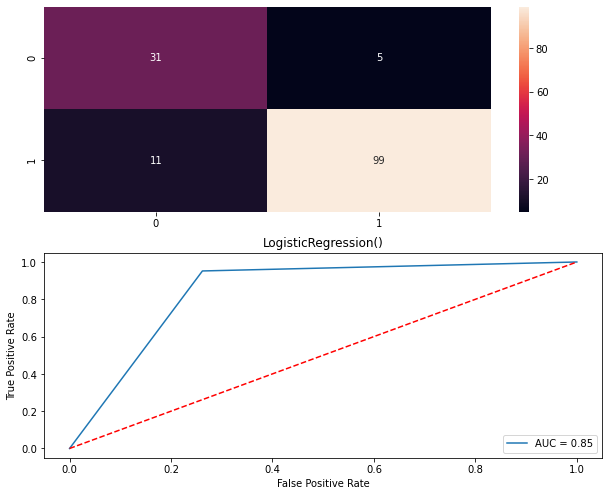

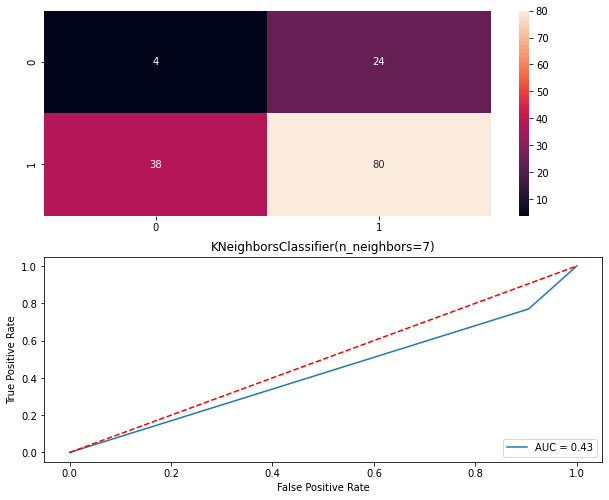

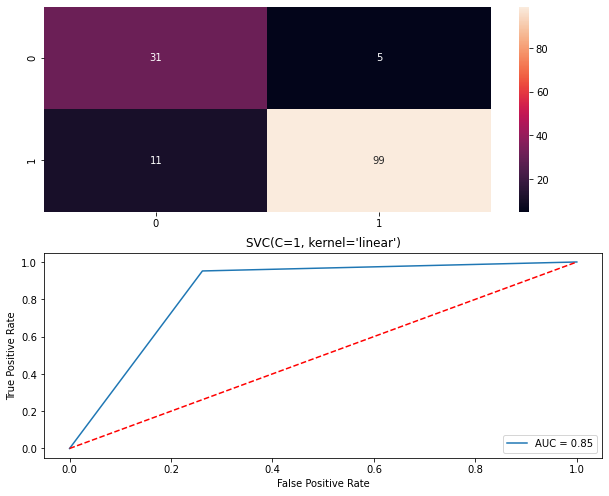

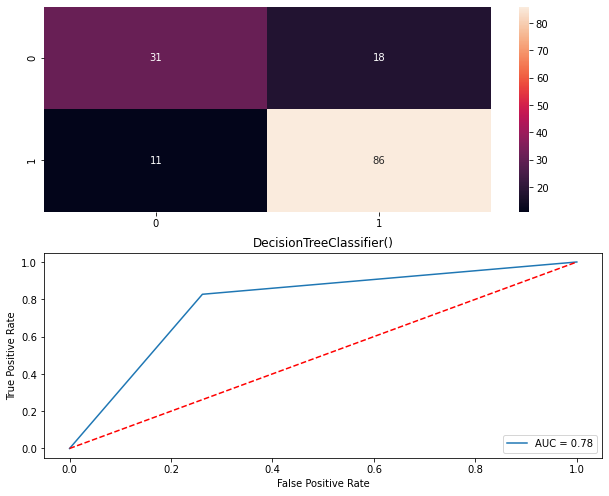

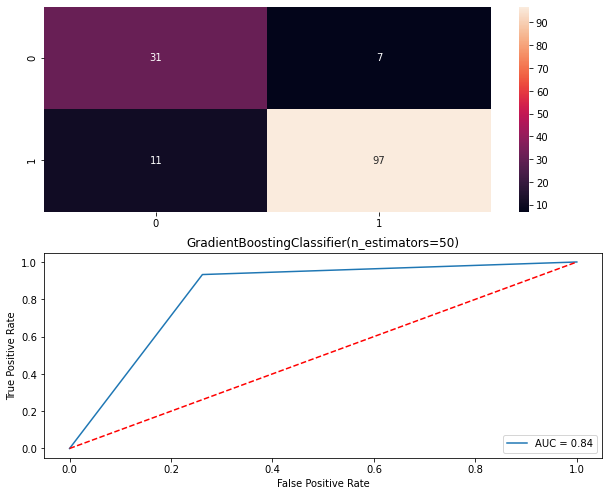

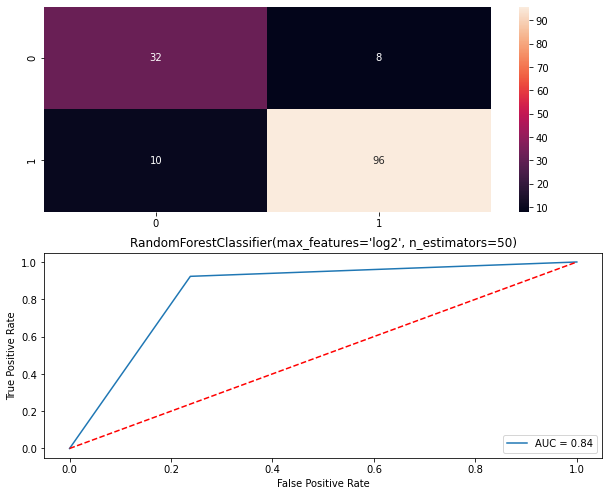

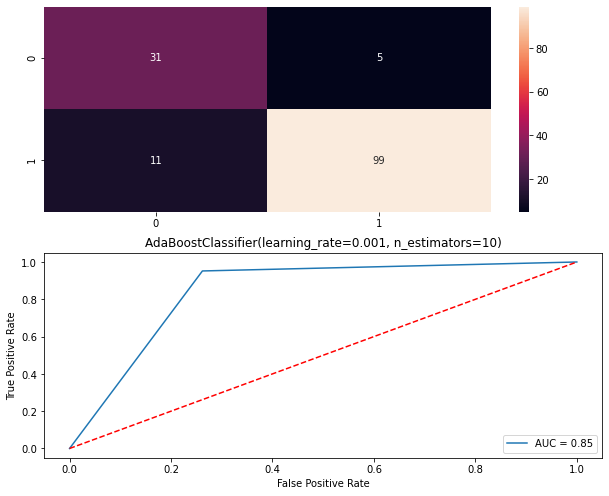

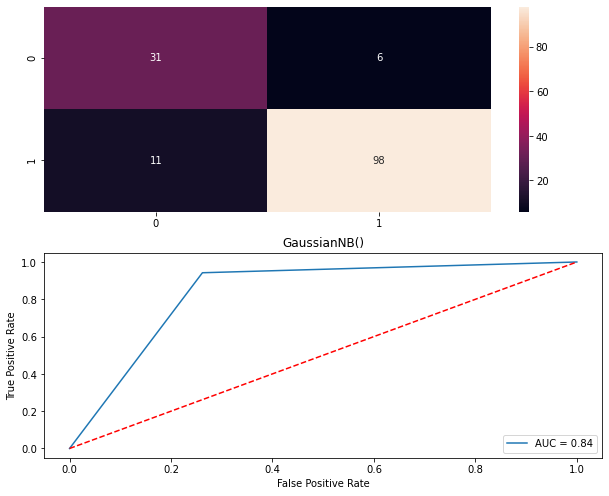

In [59]:
model=[]
score=[]
cvs=[]
rocscore=[]

for i in [LogisticRegression(penalty='l2'),KNeighborsClassifier(n_neighbors=7),SVC(C=1,kernel='linear'),
          DecisionTreeClassifier(criterion='gini'),GradientBoostingClassifier(learning_rate=0.1,n_estimators=50),
          RandomForestClassifier(max_features='log2',n_estimators=50),
          AdaBoostClassifier(learning_rate =0.001, n_estimators = 10),GaussianNB()]:
    j=i
    model.append(i)
    print("\n")
    print("The model score for",i,"are:")
    j.fit(x_train,y_train)
    j.score(x_train,y_train)
    predict=j.predict(x_test)
    print(predict)
    AS=accuracy_score(predict,y_test)
    print("Accuracy score =", AS)
    score.append(AS)
    cv_score=cross_val_score(j,x,y,cv=5,scoring="accuracy").mean()
    print("The cv score is",cv_score)
    cvs.append(cv_score)
    print("")
    cm=confusion_matrix(predict,y_test)
    print(cm)
    print("")
    print(classification_report(predict,y_test))
    print("\n")
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predict)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
   
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [60]:
output=pd.DataFrame({'Model':['LogisticRegression','KNeighborsClassifier','SVC','GaussianNB','DecisionTreeClassifier','GradientBoostingClassifier','RandomForestClassifier','AdaBoostClassifier'],'Accuracy_Score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
output

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,0.890411,0.815856,0.845009
1,KNeighborsClassifier,0.575342,0.645388,0.432234
2,SVC,0.890411,0.815856,0.845009
3,GaussianNB,0.801370,0.700589,0.782509
4,DecisionTreeClassifier,0.876712,0.752446,0.835394
5,GradientBoostingClassifier,0.876712,0.776378,0.842491
6,RandomForestClassifier,0.890411,0.815856,0.845009
7,AdaBoostClassifier,0.883562,0.814117,0.840201


In [61]:
rfc=RandomForestClassifier(max_features='auto',n_estimators=150)
rfc.fit(x_train,y_train)
predict=rfc.predict(x_test)
AS=accuracy_score(predict,y_test)
print("Accuracy Score =",AS)
cv_score=cross_val_score(j,x,y,cv=5,scoring="accuracy").mean()
print("The CV Score =",cv_score)
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predict)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score',roc_auc)

Accuracy Score = 0.8835616438356164
The CV Score = 0.8141173003241968
roc_auc_score 0.8402014652014652


In [62]:
import joblib
joblib.dump(svc,"Loan_Prediction_Data.pkl")

['Loan_Prediction_Data.pkl']